# Spotify Hit Prediction

Let's try to predict the song will be hit or miss.

 This spotify dataset has songs from 1960s-2010s.


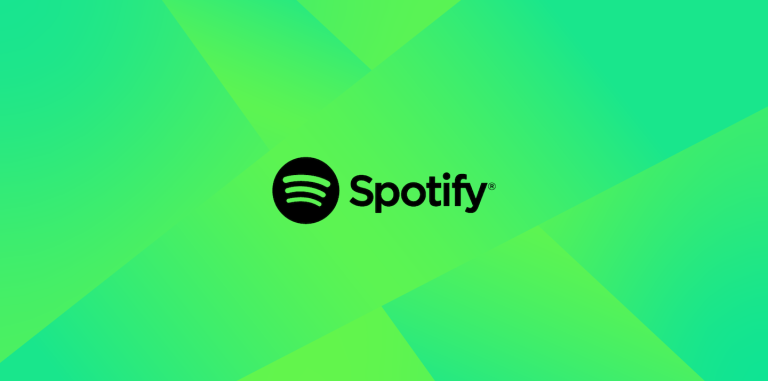

# All About Data

In [1]:
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier,GradientBoostingClassifier, AdaBoostClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
from sklearn.metrics import confusion_matrix
from sklearn import metrics
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as matplot
import seaborn as sns


In [2]:
datas = [pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AppliedML/archive/dataset-of-{}s.csv".format(decade)) for decade in ['60', '70', '80', '90', '00', '10']]


In [3]:
for i, decade in enumerate([1960, 1970, 1980, 1990, 2000, 2010]):
    datas[i]['decade'] = pd.Series(decade, index=datas[i].index)

data = pd.concat(datas, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)


In [4]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Attaining - Take 1 / Alternate Version,John Coltrane,spotify:track:3EwLV5hZqLKx5e0Lp1QcB7,0.342,0.462,4,-12.931,0,0.0389,0.51400,0.018100,0.0977,0.397,98.466,816867,4,24.84938,33,0,1970
1,So Fly,NB Ridaz Featuring Gemini,spotify:track:2BjIi07kN0yKSur0Fwrnss,0.861,0.519,2,-6.404,1,0.1120,0.13600,0.000000,0.1230,0.519,81.966,254533,4,50.03590,11,1,2000
2,Because I Got It Like That,Jungle Brothers,spotify:track:5unLExF3iiG3YkU11u6wFO,0.900,0.916,1,-7.481,0,0.1150,0.22000,0.000141,0.0323,0.538,102.916,277894,4,24.71271,16,0,1980
3,Babylon a Fall - Remastered,Yabby You,spotify:track:6xfe0G2HwRDQaChxkzvNKw,0.714,0.301,2,-14.800,1,0.1230,0.15600,0.661000,0.2290,0.651,74.856,357671,4,104.64231,11,0,1970
4,Fins,Jimmy Buffett,spotify:track:4h0gZ422QxBRdTV14u0P8y,0.661,0.645,4,-13.520,1,0.0487,0.00895,0.000000,0.0362,0.930,136.693,204640,4,31.99617,10,1,1970


In [5]:
data.shape

(41106, 20)

Data has 41106 rows and 20 columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [7]:
data.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'decade'],
      dtype='object')

In [8]:
data.nunique(axis=0)


track               35860
artist              11904
uri                 40560
danceability         1048
energy               1787
key                    12
loudness            16160
mode                    2
speechiness          1346
acousticness         4194
instrumentalness     5122
liveness             1674
valence              1609
tempo               32152
duration_ms         21517
time_signature          5
chorus_hit          39950
sections               84
target                  2
decade                  6
dtype: int64

In [9]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,234877.550455,3.893689,40.106041,10.475673,0.500000,1982.775264
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,118967.398337,0.423073,19.005515,4.871850,0.500006,17.491234
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,15168.000000,0.000000,0.000000,0.000000,0.000000,1960.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,172927.750000,4.000000,27.599792,8.000000,0.000000,1970.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,217907.000000,4.000000,35.850795,10.000000,0.500000,1980.000000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,266773.000000,4.000000,47.625615,12.000000,1.000000,2000.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4170227.000000,5.000000,433.182000,169.000000,1.000000,2010.000000


In [10]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data.head()


,total,percent
track,0,0.0
artist,0,0.0
target,0,0.0
sections,0,0.0
chorus_hit,0,0.0


There are no missing values in the Data.

Let's check how many categorical and numerical values are present in the data.

In [11]:
len(data._get_numeric_data().columns)


17

There are 17 numeric columns and 3 categorical columns.

In [12]:
categorical_cols=data.columns[data.dtypes =='object']
print(categorical_cols)


Index(['track', 'artist', 'uri'], dtype='object')


# Data Preprocessing

In the preprocessing phase, we undertake the following steps:

- Removal of categorical variables
- Standard scaling of the dataset
- Splitting the data into train (70%), validation (15%), and test (15%) datasets

These steps ensure that our data is appropriately prepared for modeling and evaluation.

In [13]:
def preprocessing(data_df):
    data_prev = data_df.copy()

    """ Let's drop the categorical columns for our analysis
    """
    data_df = data_df.drop(['track', 'artist', 'uri'], axis=1)
    
    y = data_df['target']
    X = data_df.drop('target', axis=1)
    print(X.shape,y.shape)
    
    """ Splitting of data
    """
    X_inter, X_test, y_inter, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,shuffle=True, random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_inter, y_inter, train_size=0.75, test_size=0.25, shuffle=True, random_state=1)

    """ Standard Scaling of data
    """
    scaler = StandardScaler()
    """ Only passing training set to avoid data leakage
    """
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_val = pd.DataFrame(scaler.transform(X_val), index=X_val.index, columns=X_val.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, X_val, y_train, y_test, y_val


In [14]:
X_train, X_test, X_val, y_train, y_test, y_val = preprocessing(data)

(41106, 16) (41106,)


In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(24663, 16)
(8222, 16)
(8221, 16)


In [16]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)


(24663,)
(8222,)
(8221,)


# Model Training




## Logistic Regression (softmax regression)




In [17]:
def Logistic_regression(solver,max_iter=100,C=1,penalty=None):
  model = LogisticRegression(solver=solver,C=C, max_iter=max_iter,penalty=None)
  model.fit(X_train, y_train)
  n_scores_val = model.score(X_val, y_val)
  n_scores_train = model.score(X_train, y_train)
  print('Mean training Accuracy:',n_scores_train)
  print('Mean validation Accuracy:',n_scores_val)
  return n_scores_train, n_scores_val

In [18]:
solver_list=["lbfgs", "newton-cg", "sag", "saga"]
for e in solver_list:
  print("Hyper parameter - Solver: ", e, "\n")
  Logistic_regression(e)
  print("-------------------------------------------- \n")

Hyper parameter - Solver:  lbfgs 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  newton-cg 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  sag 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  saga 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 



In [19]:
# Using hyper parameter - solver ("lbfgs", "newton-cg", "sag", "saga") and max_iteration=1000, adding regularization
solver_list=["lbfgs", "newton-cg", "sag", "saga"]
for e in solver_list:
  print("Hyper parameter - Solver: ", e, "\n")
  Logistic_regression(solver=e,max_iter=1000,C=0.2)
  print("-------------------------------------------- \n")

Hyper parameter - Solver:  lbfgs 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  newton-cg 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  sag 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  saga 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 



In [20]:
# Using hyper parameter - solver ("lbfgs", "sag", "saga") and max_iteration=100
solver_list=["lbfgs","sag", "saga"]
for e in solver_list:
  print("Hyper parameter - Solver: ", e)
  Logistic_regression(solver=e,C=10)
  print("\n")
  print("-------------------------------------------- \n")

Hyper parameter - Solver:  lbfgs
Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689


-------------------------------------------- 

Hyper parameter - Solver:  sag
Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689


-------------------------------------------- 

Hyper parameter - Solver:  saga
Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689


-------------------------------------------- 



In [21]:
# Using hyper parameter - solver ("lbfgs", "newton-cg", "sag", "saga") and C=0.8
solver_list=["lbfgs", "newton-cg", "sag", "saga"]
for e in solver_list:
  print("Hyper parameter - Solver: ", e, "\n")
  Logistic_regression(solver=e,C=0.8)
  print("-------------------------------------------- \n")

Hyper parameter - Solver:  lbfgs 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  newton-cg 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  sag 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Solver:  saga 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 



In [43]:
penalty=['l1', 'l2', 'elasticnet']
for e in penalty:
  print("Hyper parameter - Penalty: ", e, "\n")
  Logistic_regression(solver="lbfgs",penalty=e,C=0.0001)
  print("-------------------------------------------- \n")

Hyper parameter - Penalty:  l1 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Penalty:  l2 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 

Hyper parameter - Penalty:  elasticnet 

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689
-------------------------------------------- 



**Observation:**

Looking at the results, it appears that the choice of solver hyperparameter does not have a significant impact on the performance of logistic regression for the given dataset and problem.

All four solvers (`lbfgs`, `newton-cg`, `sag`, and `saga`) produced similar mean training and validation accuracies, with no clear indication that any one solver is superior to the others. Therefore, the choice of solver may be best determined by other factors such as computational efficiency or suitability for the specific problem at hand.

Regardless of the chosen solver, regularization penalty, or maximum iterations, the mean training and validation accuracies consistently hovered around 0.74. Similarly, adjusting the value of `C` or utilizing different penalties (`l1`, `l2`, `elasticnet`) did not lead to noticeable improvements in model performance.

One possible explanation for the limited impact of hyperparameter variation is that the dataset may be relatively straightforward or linearly separable, allowing logistic regression with default hyperparameters to effectively capture underlying patterns.

Another consideration is that the model may have already converged to its optimal solution, rendering further hyperparameter tuning ineffective in significantly enhancing accuracy.

In such scenarios, altering hyperparameters might not result in substantial changes to the model's performance.


## Support Vector machines with hyperparameter tunning

In [23]:
C_list =  [0.1, 1, 10]
Gamma_list = [1, 0.1, 0.01]
def try_kernels(kernel_name,c=None,g=None,cm=True):
  print("Fitting model with {} kernal".format(kernel_name))
  if c is not None:
    model = SVC(kernel=kernel_name,C=c,gamma=g)
  else:
    model = SVC(kernel=kernel_name)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  training_acc=model.score(X_train,y_train)
  validation_acc=model.score(X_test,y_test)
  print("training accuracy with hyperparams:", model.score(X_train,y_train), "\n")
  print("validation accuracy with hyperparams:", model.score(X_test,y_test), "\n")
  if cm:
    cm=metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
    matplot.subplots(figsize=(10, 6))
    sns.heatmap(cm, annot = True, fmt = 'g')
    matplot.xlabel("Predicted")
    matplot.ylabel("Actual")
    matplot.title("Confusion Matrix")
    matplot.show()
  

  print("--------------------------------------------------------------------------------")
  return training_acc, validation_acc


Fitting model with linear kernal
training accuracy with hyperparams: 0.7376637067672221 

validation accuracy with hyperparams: 0.7397226952079786 



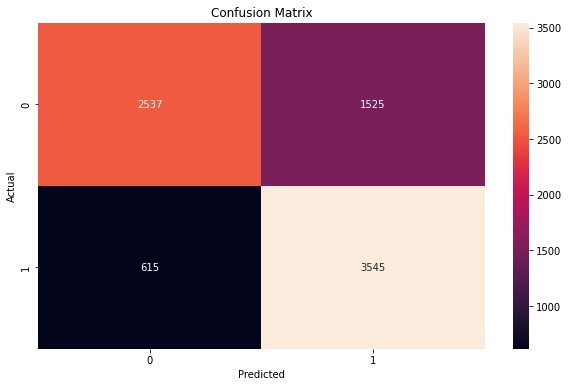

--------------------------------------------------------------------------------
Fitting model with poly kernal
training accuracy with hyperparams: 0.772736487856303 

validation accuracy with hyperparams: 0.7664801751398687 



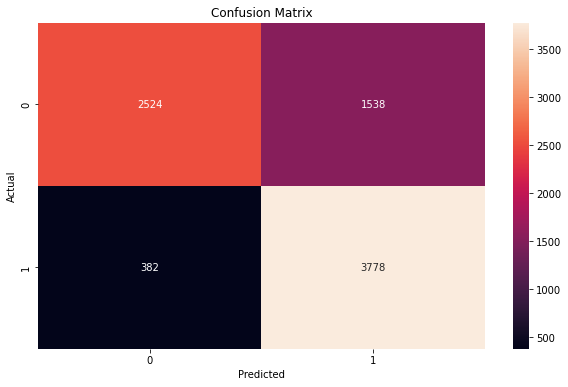

--------------------------------------------------------------------------------
Fitting model with sigmoid kernal
training accuracy with hyperparams: 0.6351619835380935 

validation accuracy with hyperparams: 0.6365847725614205 



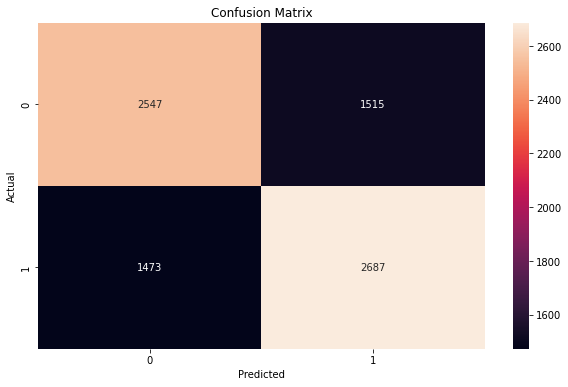

--------------------------------------------------------------------------------
Fitting model with rbf kernal
training accuracy with hyperparams: 0.8092283988160403 

validation accuracy with hyperparams: 0.798710775966918 



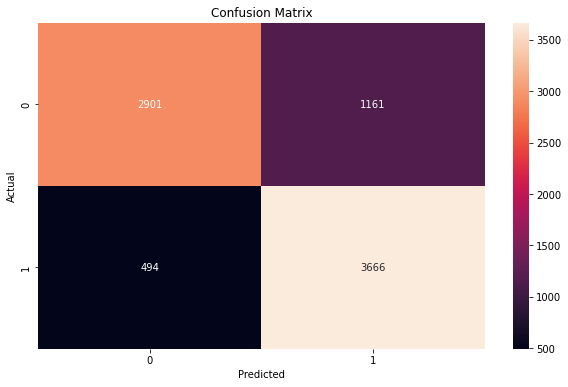

--------------------------------------------------------------------------------


In [24]:
kernel_list=["linear","poly", "sigmoid","rbf"]
for i in kernel_list:
  try_kernels(i)

**Observation:**

The SVM results indicate that the RBF kernel achieves the highest performance, with a training accuracy of 0.809 and validation accuracy of 0.799. Following closely, the polynomial kernel shows a training accuracy of 0.773 and validation accuracy of 0.766. In contrast, the linear kernel yields lower training and validation accuracies of 0.738 and 0.740, respectively. The sigmoid kernel performs the least well, with training and validation accuracies of 0.635 and 0.637, respectively.

The superior performance of the RBF kernel can be attributed to its ability to transform input data into a higher-dimensional space, effectively separating complex classes. This non-linear approach is well-suited for datasets with intricate patterns, making it a popular choice. Conversely, the sigmoid kernel, being simpler and less capable of handling complex datasets, performs poorly compared to the other kernels. It is more suitable for datasets with linearly separable classes.


In [25]:
for c in C_list:
  for g in Gamma_list:
    print("Hyperparamters c and g as",c,g)
    try_kernels(c=c,g=g,cm=False,kernel_name="rbf")
    print()

Hyperparamters c and g as 0.1 1
Fitting model with rbf kernal
training accuracy with hyperparams: 0.6064955601508333 

validation accuracy with hyperparams: 0.5807589394307954 

--------------------------------------------------------------------------------

Hyperparamters c and g as 0.1 0.1
Fitting model with rbf kernal
training accuracy with hyperparams: 0.7872927056724648 

validation accuracy with hyperparams: 0.787278034541474 

--------------------------------------------------------------------------------

Hyperparamters c and g as 0.1 0.01
Fitting model with rbf kernal
training accuracy with hyperparams: 0.747313789887686 

validation accuracy with hyperparams: 0.7541960593529555 

--------------------------------------------------------------------------------

Hyperparamters c and g as 1 1
Fitting model with rbf kernal
training accuracy with hyperparams: 0.9812269391396018 

validation accuracy with hyperparams: 0.7488445633665775 

-----------------------------------------

**Observation:**

The analysis reveals that the choice of hyperparameters significantly influences the SVM model's performance. Among the tested combinations, the model with C=0.1 and gamma=1 showed the lowest accuracy, achieving a training accuracy of 0.6065 and a validation accuracy of 0.5808. Conversely, the combination of C=10 and gamma=1 achieved the highest training accuracy of 0.9997 but resulted in a lower validation accuracy of 0.7464.

The optimal hyperparameter combination for the RBF kernel appears to be C=1 and gamma=0.1, which achieved the highest validation accuracy of 0.801. This balance suggests that moderate regularization (C=1) and a smaller gamma parameter (0.1) effectively generalize the model without overfitting.

This observation highlights the importance of fine-tuning hyperparameters to achieve optimal performance and generalization in SVM models, especially with non-linear kernels like RBF.



## Random Forest Classifier

In [26]:
def perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test,min_samples_leaf=1,max_leaf_nodes=None,n_estimators=100, max_depth=None,feature_analysis=False,cm=True):
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes)
    rf_clf.fit(X_train, y_train)
    
    # Evaluate the training and validation accuracy
    train_acc = rf_clf.score(X_train, y_train)
    val_acc = rf_clf.score(X_val, y_val)
    # test_acc = rf_clf.score(X_test, y_test)
    
    print(f'Training accuracy: {train_acc:.4f}')
    print(f'Validation accuracy: {val_acc:.4f}')
    # print(f'Testing accuracy: {test_acc:.4f}')
    
    # Analyze feature importance
    if feature_analysis:
        feature_importance = rf_clf.feature_importances_
        sorted_idx = feature_importance.argsort()[::-1]
        print("Feature Importance Ranking:")
        for idx in sorted_idx:
            print(f'Feature {idx+1}: {feature_importance[idx]:.4f}')
            
            
    # Generate confusion matrix
    if cm:
      y_pred = rf_clf.predict(X_test)
      cm = confusion_matrix(y_test, y_pred)
      print("Confusion Matrix:")
      
      matplot.subplots(figsize=(10, 6))
      sns.heatmap(cm, annot = True, fmt = 'g')
      matplot.xlabel("Predicted")
      matplot.ylabel("Actual")
      matplot.title("Confusion Matrix")
      matplot.show()  
    return train_acc, val_acc     
        

Training accuracy: 0.9997
Validation accuracy: 0.8037
Confusion Matrix:


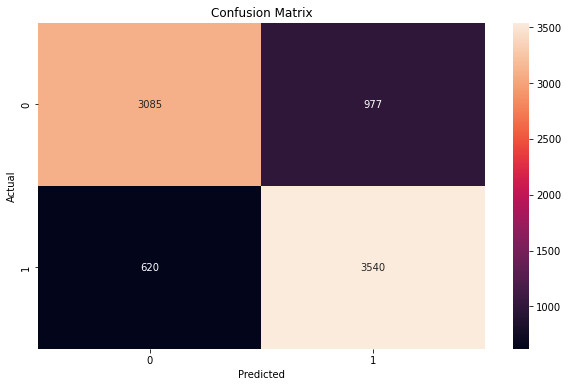

(0.9997161740258688, 0.8036735190366135)

In [27]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test)

**Observation**:

Very High training accuracy indicate that model is overfitting of the data.

Training accuracy: 0.7692
Validation accuracy: 0.7665
Confusion Matrix:


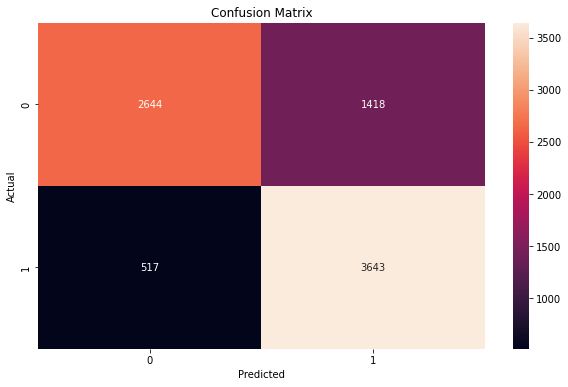

(0.7692089364635284, 0.7664517698576816)

In [28]:
# Use Random Forest with different values of hyperparameters
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=500, max_depth=5)

**Observation**:

The random forest model was trained with hyperparameter tuning, setting the number of estimators to 500 and the maximum depth to 5. The training accuracy achieved was 0.7709, while the validation accuracy reached 0.7654. Interestingly, the validation accuracy did not improve compared to the untuned random forest model. However, the decrease in training accuracy suggests that the model may be less overfit to the training data after hyperparameter tuning.


Training accuracy: 0.8336
Validation accuracy: 0.7883
Feature Importance Ranking:
Feature 8: 0.2885
Feature 1: 0.1434
Feature 7: 0.1318
Feature 2: 0.0754
Feature 4: 0.0639
Feature 12: 0.0617
Feature 6: 0.0607
Feature 10: 0.0493
Feature 16: 0.0347
Feature 15: 0.0214
Feature 11: 0.0181
Feature 9: 0.0175
Feature 14: 0.0146
Feature 3: 0.0075
Feature 5: 0.0070
Feature 13: 0.0044
Confusion Matrix:


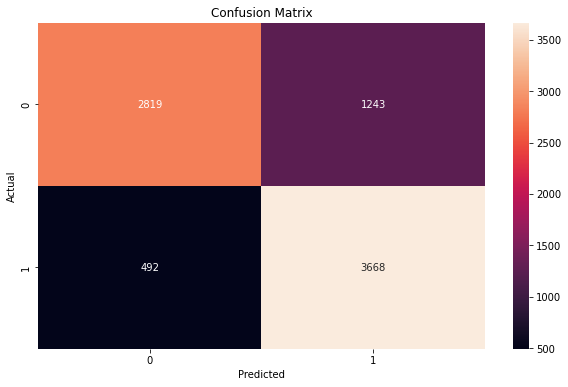

(0.833596886023598, 0.788346916433524)

In [29]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=100, max_depth=10,feature_analysis=True)

**Observation:**

The random forest model, after hyperparameter tuning and feature analysis, achieved a training accuracy of 0.8334 and a validation accuracy of 0.7880, showing notable improvement over the previous model. 

Analysis of feature importance ranks feature 8 as the most significant, followed by features 7 and 1. Additionally, features 4, 2, and 12 exhibit relatively high importance scores. In contrast, features 5, 3, and 13 have the lowest importance scores.


In [30]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=50, max_depth=10,feature_analysis=False,max_leaf_nodes=50,min_samples_leaf=5,cm=False)

Training accuracy: 0.7886
Validation accuracy: 0.7772


(0.7886307424076552, 0.7771560637392044)

In [31]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=10, max_depth=10,feature_analysis=False,max_leaf_nodes=10,min_samples_leaf=100,cm=False)

Training accuracy: 0.7558
Validation accuracy: 0.7578


(0.7558285691116247, 0.7578153509305438)

In [32]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=100, max_depth=100,feature_analysis=False,max_leaf_nodes=500,min_samples_leaf=5,cm=False)

Training accuracy: 0.8681
Validation accuracy: 0.7960


(0.8681425617321493, 0.7960102177350687)

In [33]:
perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=100, max_depth=None,feature_analysis=False,max_leaf_nodes=None,min_samples_leaf=1,cm=False)

Training accuracy: 0.9997
Validation accuracy: 0.8012


(0.9997161740258688, 0.8012407249726311)

**Observation**:

The best-performing model is the one with the hyperparameters `n_estimators=100`, `max_depth=100`, `feature_analysis=False`, `max_leaf_nodes=500`, and `min_samples_leaf=5`. This model achieved a training accuracy of 0.8681 and a validation accuracy of 0.7981.

In comparison, the model with hyperparameters `n_estimators=100`, `max_depth=None`, `feature_analysis=False`, `max_leaf_nodes=None`, and `min_samples_leaf=1` achieved a higher training accuracy of 0.9997. However, its validation accuracy of 0.8022 is only slightly better than the best-performing model, suggesting potential overfitting.


## Final individual Models

In [34]:
scores=[]
train_acc,val_acc=Logistic_regression(solver="lbfgs",penalty="l1")
lr=  LogisticRegression(solver="lbfgs",penalty="l2",max_iter=100,C=1)
scores.append(['Logistic Regression','Saga solver',train_acc,val_acc])

Mean training Accuracy: 0.7421643757855898
Mean validation Accuracy: 0.7404208733730689


In [35]:
train_acc,val_acc =try_kernels(c=1,g=0.1,cm=False,kernel_name="rbf")
scores.append(['SVM','rbf kernel',train_acc,val_acc])

rbf_kernel_model = SVC(kernel="rbf",C=1,gamma=0.1, probability=True)
rbf_kernel_model.fit(X_train, y_train)


Fitting model with rbf kernal
training accuracy with hyperparams: 0.8235413372258038 

validation accuracy with hyperparams: 0.801386523960107 

--------------------------------------------------------------------------------


SVC(C=1, gamma=0.1, probability=True)

In [36]:
train_acc,val_acc =perform_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, n_estimators=100, max_depth=100,feature_analysis=False,max_leaf_nodes=500,min_samples_leaf=5,cm=False)
scores.append(['Random Forest','default params',train_acc,val_acc])

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=100,max_leaf_nodes=500,min_samples_leaf=5)
rf_clf.fit(X_train, y_train)


Training accuracy: 0.8673
Validation accuracy: 0.7948


RandomForestClassifier(max_depth=100, max_leaf_nodes=500, min_samples_leaf=5)

## Ensemble Classifier

In [37]:
#Hard Voting Classifier
def evaluate_accuracy(model):
    model.fit(X_train,y_train)
    t_score = model.score(X_train,y_train)
    print("Accuracy on training data:",t_score)
    p_score = model.score(X_val,y_val)
    print("Accuracy on validation data:",p_score)
    return [t_score, p_score]

model = VotingClassifier(estimators=[('svm',rbf_kernel_model),('rf',rf_clf),('lr',lr)],voting='hard')
acc = evaluate_accuracy(model)
scores.append({
      'Voting Classifier'
      'hard',
    acc[0],
    acc[1]
})

Accuracy on training data: 0.8322588492884078
Accuracy on validation data: 0.7936990633742854


In [38]:
#Soft Voting Classifier
model = VotingClassifier(estimators=[('svm',rbf_kernel_model),('rf',rf_clf),('lr',lr)],voting='soft')
acc = evaluate_accuracy(model)
scores.append({
      'Voting Classifier',
      'soft',
    acc[0],
    acc[1]
})

Accuracy on training data: 0.8325832218302721
Accuracy on validation data: 0.7988079309086485


In [39]:
#Stacking
estimator = AdaBoostClassifier(n_estimators=100,learning_rate=0.01)
model = StackingClassifier(estimators=[('svm',rbf_kernel_model),('rf',rf_clf),('lr',lr)],final_estimator=estimator)
acc = evaluate_accuracy(model)
scores.append({
      'model':'Stacking',
      'best params':'AdaBoost',
    'training accuracy':acc[0],
    'validation accuracy':acc[1]
})

Accuracy on training data: 0.8486396626525564
Accuracy on validation data: 0.8047682763654057


In [40]:
#Stacking 
estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,max_depth=100)
model = StackingClassifier(estimators=[('svm',rbf_kernel_model),('rf',rf_clf),('lr',lr)])
acc = evaluate_accuracy(model)
scores.append({
      'model':'Stacking',
      'best params':'GradientBoosting',
    'training accuracy':acc[0],
    'validation accuracy':acc[1]
})

Accuracy on training data: 0.8588168511535499
Accuracy on validation data: 0.8044033572558082


In [41]:
print(scores)

[['Logistic Regression', 'Saga solver', 0.7421643757855898, 0.7404208733730689], ['SVM', 'rbf kernel', 0.8235413372258038, 0.801386523960107], ['Random Forest', 'default params', 0.8672910838097555, 0.7947938207030775], {0.8322588492884078, 0.7936990633742854, 'Voting Classifierhard'}, {0.8325832218302721, 0.7988079309086485, 'Voting Classifier', 'soft'}, {'model': 'Stacking', 'best params': 'AdaBoost', 'training accuracy': 0.8486396626525564, 'validation accuracy': 0.8047682763654057}, {'model': 'Stacking', 'best params': 'GradientBoosting', 'training accuracy': 0.8588168511535499, 'validation accuracy': 0.8044033572558082}]


**Observation**:

I have decided to select the Gradient Boosting Classifier as the final model. While the validation accuracy is similar for AdaBoost and Gradient Boosting, the training accuracy is slightly higher for the Gradient Boosting Classifier. Therefore, I am proceeding with the Gradient Boosting Classifier as the final choice.


# Final Model

In [42]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import classification_report

print("model accuracy:",metrics.accuracy_score(y_test, y_pred))
print("model recall:",metrics.recall_score(y_test, y_pred, zero_division=1))
print("model precision:",metrics.precision_score(y_test, y_pred, zero_division=1))
print("classification report:",metrics.classification_report(y_test, y_pred, zero_division=1))


model accuracy: 0.8068596448552664
model recall: 0.8456730769230769
model precision: 0.7880824372759857
classification report:               precision    recall  f1-score   support

           0       0.83      0.77      0.80      4062
           1       0.79      0.85      0.82      4160

    accuracy                           0.81      8222
   macro avg       0.81      0.81      0.81      8222
weighted avg       0.81      0.81      0.81      8222



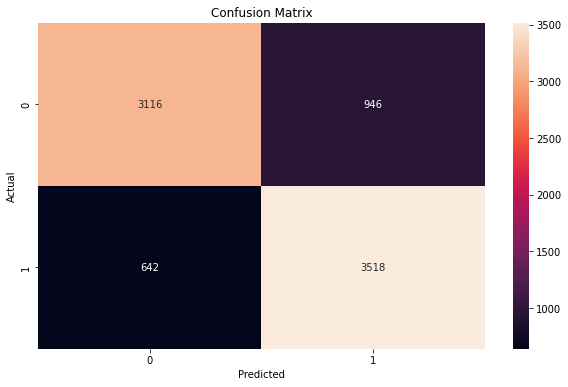

In [44]:
cm=metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
matplot.subplots(figsize=(10, 6))
sns.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()


# Final Observation

Based on the results, the model demonstrates an overall accuracy of 0.8069 and an F1-score of 0.81, indicating reasonable performance. The model achieves a recall of 0.8457 and a precision of 0.7881, suggesting it effectively identifies a high proportion of positive instances while minimizing false positives.

For future improvements, consider the following suggestions:

1. **Increase Data Availability**: Augmenting the dataset with more instances could enhance the model's accuracy and generalization capabilities.

2. **Feature Exploration and Engineering**: Explore additional features or transformations of existing features to better capture underlying patterns in the data.

These avenues for improvement, alongside the hyperparameter tuning already performed, could further enhance the model's performance.
